In [41]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [42]:
all_df = pd.read_csv("star.csv")

In [43]:
all_df[:5]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [44]:
X=all_df.drop(['target_class'], axis=1).values.astype('float64')

In [45]:
Y = all_df['target_class'].values.astype('int64')

In [46]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

14318

In [47]:
X.shape

(17898, 8)

In [48]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [49]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [50]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [51]:
model = Sequential()

In [52]:
model.add(Conv1D(filters=16*9,
                 kernel_size=1,
                 input_shape=(8,1),
                 padding='valid',
                 activation='relu'))

In [53]:
model.add(MaxPooling1D(pool_size=1))

In [54]:
model.add(Conv1D(filters=16*8,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [55]:
model.add(MaxPooling1D(pool_size=1))

In [56]:
model.add(Conv1D(filters=16*7,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [57]:
model.add(MaxPooling1D(pool_size=1))

In [58]:
model.add(Conv1D(filters=16*6,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [59]:
model.add(MaxPooling1D(pool_size=1))

In [60]:
model.add(Conv1D(filters=16*5,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [61]:
model.add(MaxPooling1D(pool_size=1))

In [62]:
model.add(Conv1D(filters=16*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [63]:
model.add(MaxPooling1D(pool_size=1))

In [64]:
model.add(Conv1D(filters=16*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [65]:
model.add(MaxPooling1D(pool_size=1))

In [66]:
model.add(Conv1D(filters=16*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [67]:
model.add(MaxPooling1D(pool_size=1))

In [68]:
model.add(Conv1D(filters=16,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [69]:
model.add(MaxPooling1D(pool_size=1))

In [70]:
model.add(Flatten())

In [71]:
model.add(Dense(8, activation='tanh'))

In [72]:
model.add(Dense(1,activation='sigmoid'))

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 8, 144)            288       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 8, 144)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 8, 128)            18560     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 8, 128)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 8, 112)            14448     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 8, 112)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 8, 96)             10848     
__________

In [74]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [75]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 11454 samples, validate on 2864 samples
Epoch 1/30
11454/11454 [==============================] - 7s 599us/step - loss: 0.6577 - acc: 0.8236 - val_loss: 0.5829 - val_acc: 0.9015
Epoch 2/30
11454/11454 [==============================] - 6s 482us/step - loss: 0.4811 - acc: 0.9102 - val_loss: 0.3682 - val_acc: 0.9015
Epoch 3/30
11454/11454 [==============================] - 4s 326us/step - loss: 0.3124 - acc: 0.9102 - val_loss: 0.3083 - val_acc: 0.9015
Epoch 4/30
11454/11454 [==============================] - 4s 337us/step - loss: 0.2597 - acc: 0.9102 - val_loss: 0.2709 - val_acc: 0.9015
Epoch 5/30
11454/11454 [==============================] - 4s 356us/step - loss: 0.2458 - acc: 0.9102 - val_loss: 0.2652 - val_acc: 0.9015
Epoch 6/30
11454/11454 [==============================] - 4s 385us/step - loss: 0.2340 - acc: 0.9102 - val_loss: 0.2495 - val_acc: 0.9015
Epoch 7/30
11454/11454 [==============================] - 4s 370us/step - loss: 0.2202 - acc: 0.9102 - val_loss: 0.2349 - v

In [76]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

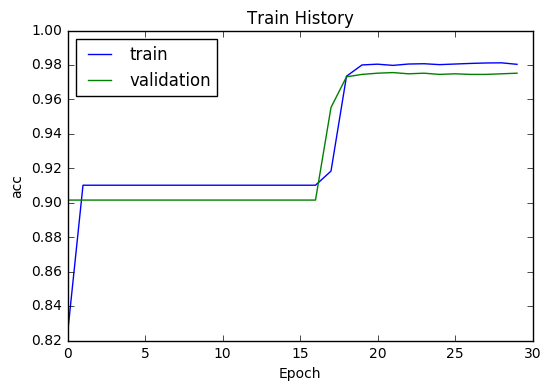

In [77]:
show_train_history(train_history,'acc','val_acc')

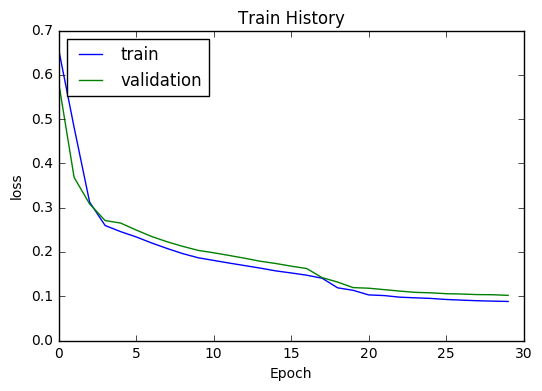

In [78]:
show_train_history(train_history,'loss','val_loss')

In [79]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3580/3580 [==============================] - 1s 216us/step


In [80]:
scores[1]

0.9796089383476939